In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
import librosa
import librosa.display

a) Im folgenden verwenden Sie den Kammerton (𝑓" = 440 Hz, 𝑥" = 1) als Referenzsignal für die
Quantisierung.
Plotten Sie die folgenden Funktionen x, sin(x), ln(sin(x), ln(|sin(x)| und ln(|sin(x) +1) und vergleichen
deren Kurvenverlauf.

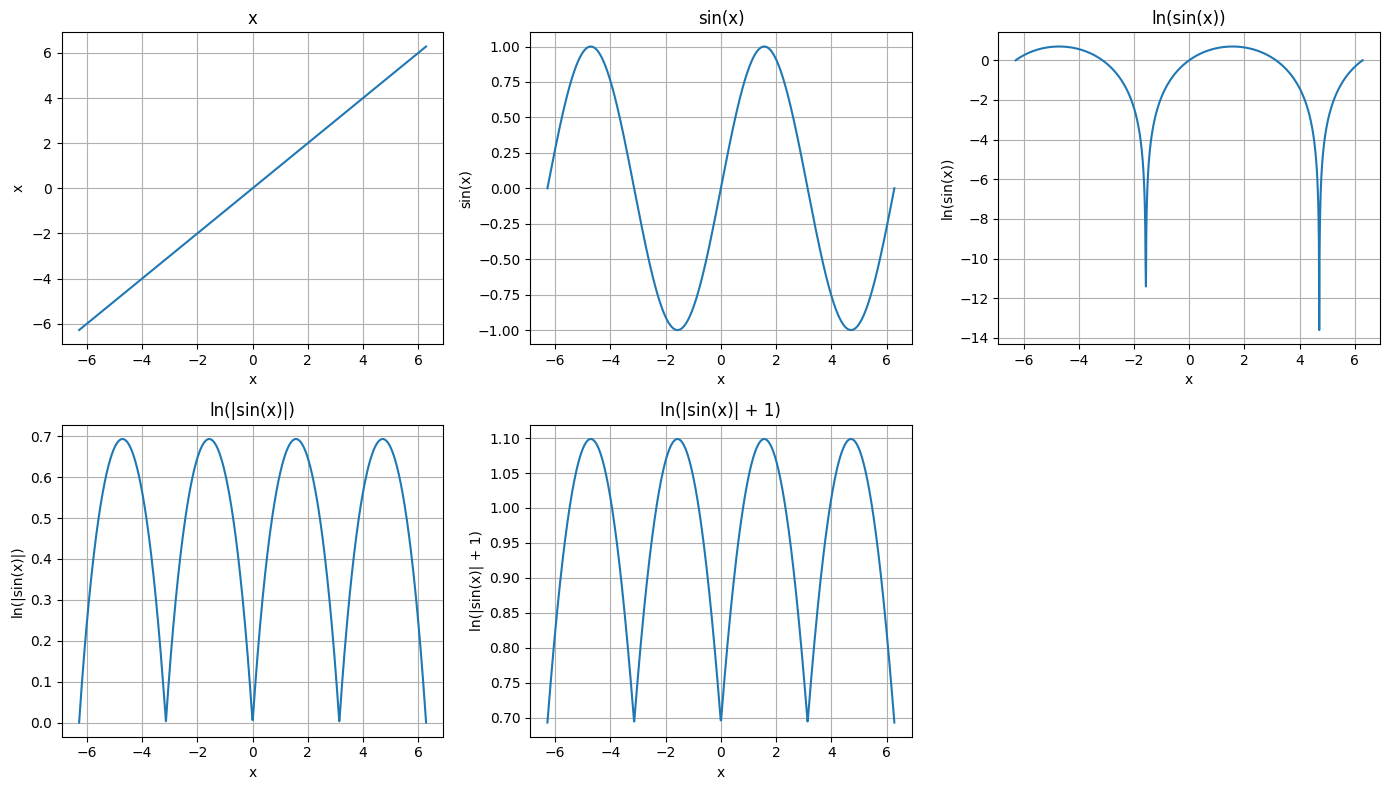

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

sin_x = np.sin(x)
ln_sin_x = np.log1p(sin_x) 
ln_abs_sin_x = np.log1p(np.abs(sin_x))  
ln_abs_sin_x_plus_1 = np.log1p(np.abs(sin_x) + 1)  # V

# Schritt 3: Plotten der Funktionen
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.plot(x, x, label='x')
plt.title('x')
plt.xlabel('x')
plt.ylabel('x')
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, sin_x, label='sin(x)')
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, ln_sin_x, label='ln(sin(x))')
plt.title('ln(sin(x))')
plt.xlabel('x')
plt.ylabel('ln(sin(x))')
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, ln_abs_sin_x, label='ln(|sin(x)|)')
plt.title('ln(|sin(x)|)')
plt.xlabel('x')
plt.ylabel('ln(|sin(x)|)')
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, ln_abs_sin_x_plus_1, label='ln(|sin(x)| + 1)')
plt.title('ln(|sin(x)| + 1)')
plt.xlabel('x')
plt.ylabel('ln(|sin(x)| + 1)')
plt.grid(True)

plt.tight_layout()
plt.show()


b) Generieren Sie anschließend ein sogenanntes sweep-Sprachsignal mit f- ∈ [200Hz, 1,6kHz] und f.
∈ [500𝐻𝑧, 4,0𝑘𝐻𝑧] mit einer Dauer von t/ =3s und einer zufällig gewählten Phase 𝜑. Recherchieren 
Sie den Einsatz von sweep-Signalen.

$x(t) = \sum \limits _{i=1} ^{8} (x_{0}(i) sin (2\pi (f _{0}(i) t + (f _{0}(i) - f _{1}(i) \frac{t^{2}} {2t _{d}}) + \phi (i)))) $

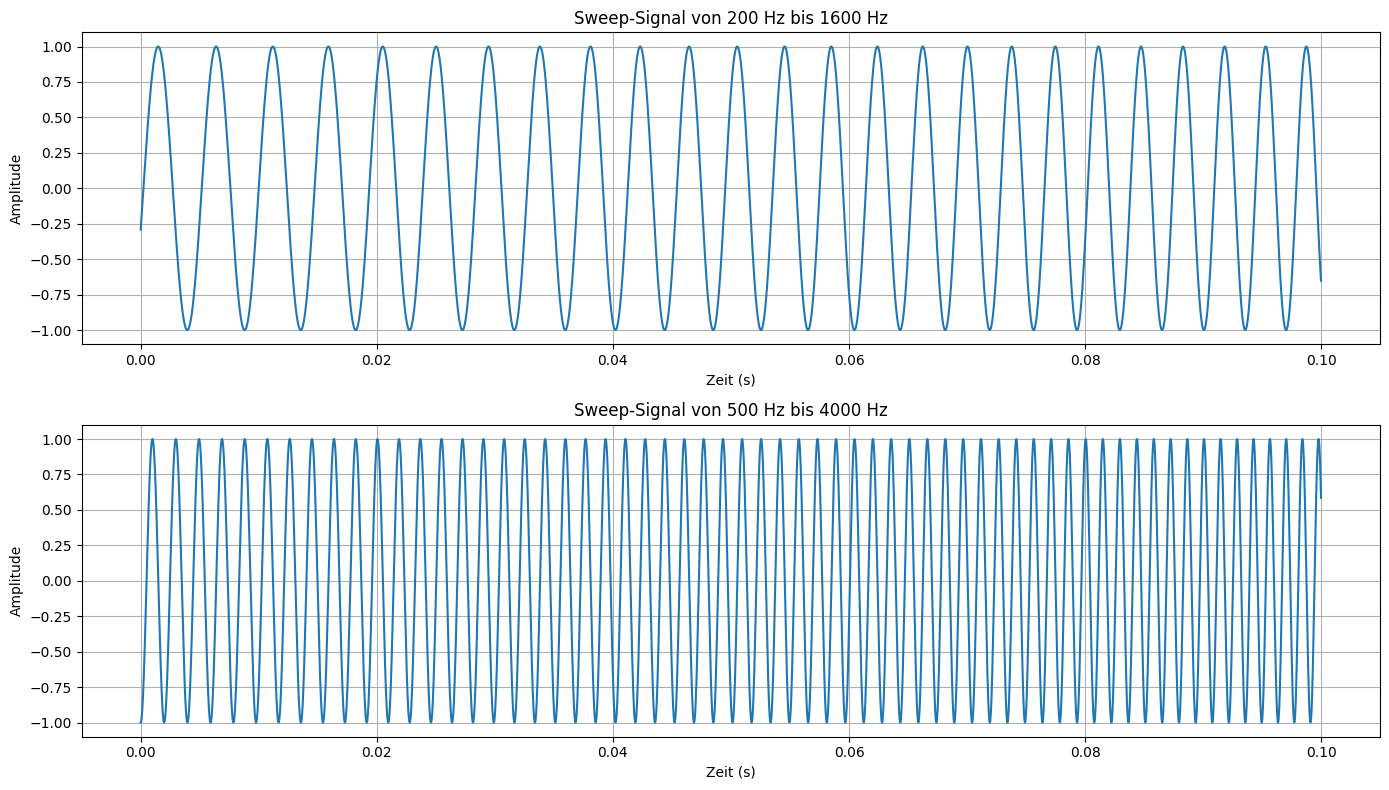

In [4]:
def generate_sweep_signal(f_start, f_end, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration))
    phase = np.random.uniform(0, 2 * np.pi)
    k = (f_end - f_start) / duration
    sweep_signal = np.sin(2 * np.pi * ((f_start + (f_end - f_start) * t / duration) * t + phase))
    return t, sweep_signal

duration = 3  
sample_rate = 44100  # Abtastrate

t1, sweep_signal_1 = generate_sweep_signal(200, 1600, duration, sample_rate)
t2, sweep_signal_2 = generate_sweep_signal(500, 4000, duration, sample_rate)

plt.figure(figsize=(14, 8))

#Zoom für bessere Lesbarkeit
zoom_duration = 0.1  
zoom_samples = int(sample_rate * zoom_duration)

plt.subplot(2, 1, 1)
plt.plot(t1[:zoom_samples], sweep_signal_1[:zoom_samples])
plt.title('Sweep-Signal von 200 Hz bis 1600 Hz')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t2[:zoom_samples], sweep_signal_2[:zoom_samples])
plt.title('Sweep-Signal von 500 Hz bis 4000 Hz')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


c) Erstellen Sie jetzt einen logarithmischen und linearen Quantisierer und kodieren das sweep-
Sprachsignal mit 2Bit und 8Bit. Plotten Sie jetzt die kodierten Signale beider Verfahren.

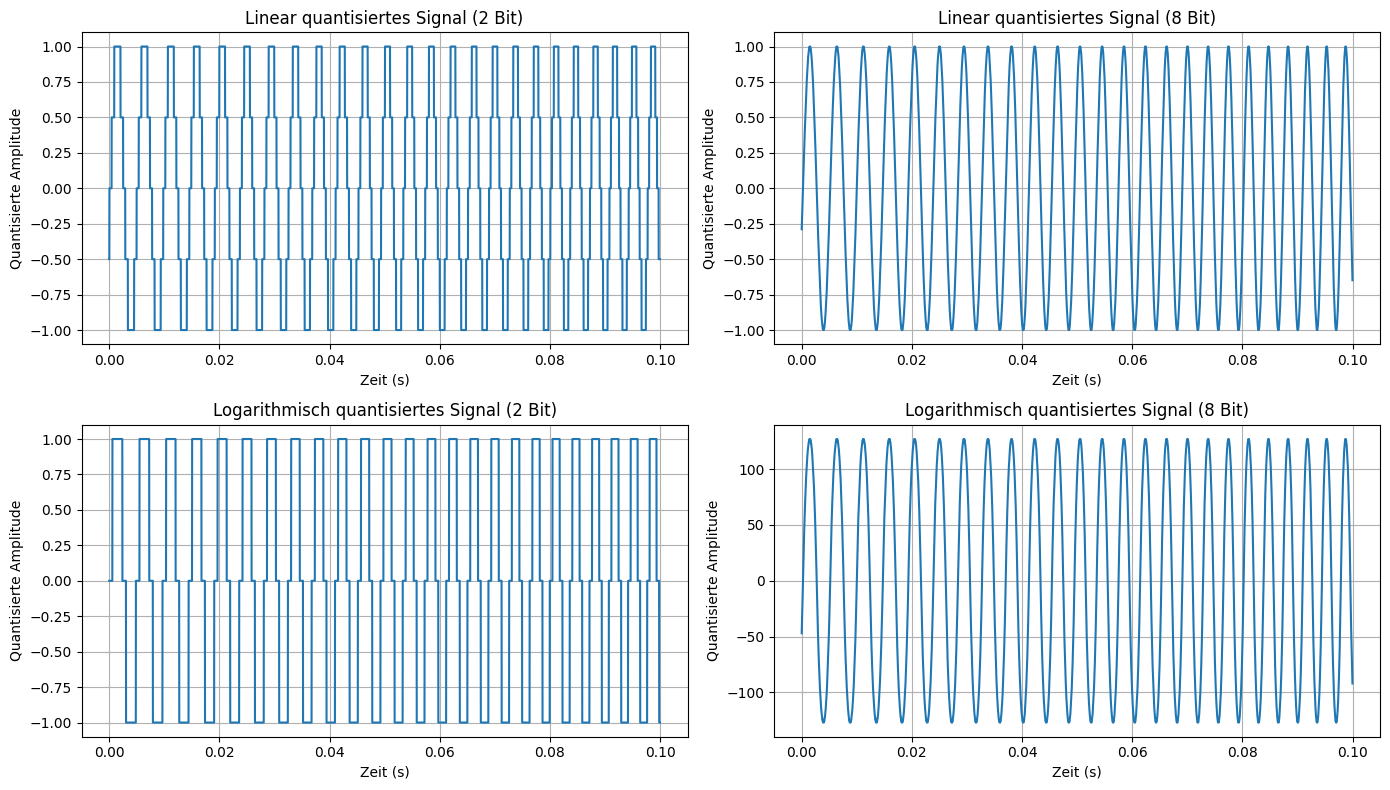

In [5]:
def linear_quantize(signal, num_bits):
    quant_levels = 2**num_bits
    max_val = np.max(np.abs(signal))
    quantized_signal = np.round((signal / max_val) * (quant_levels // 2)) * (max_val / (quant_levels // 2))
    return quantized_signal, max_val

def logarithmic_quantize(signal, num_bits):
    sign = np.sign(signal)
    abs_signal = np.abs(signal)
    log_signal = np.log1p(abs_signal)
    max_log_signal = np.max(log_signal)
    quantized_log_signal = np.round(log_signal / max_log_signal * (2**(num_bits-1) - 1))
    return sign * quantized_log_signal, max_log_signal

sweep_signal = sweep_signal_1  

quantized_linear_2bit, max_linear_2bit = linear_quantize(sweep_signal, 2)
quantized_linear_8bit, max_linear_8bit = linear_quantize(sweep_signal, 8)
quantized_log_2bit, max_log_2bit = logarithmic_quantize(sweep_signal, 2)
quantized_log_8bit, max_log_8bit = logarithmic_quantize(sweep_signal, 8)

plt.figure(figsize=(14, 8))

zoom_duration = 0.1 
zoom_samples = int(sample_rate * zoom_duration)

plt.subplot(2, 2, 1)
plt.plot(t1[:zoom_samples], quantized_linear_2bit[:zoom_samples])
plt.title('Linear quantisiertes Signal (2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t1[:zoom_samples], quantized_linear_8bit[:zoom_samples])
plt.title('Linear quantisiertes Signal (8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t1[:zoom_samples], quantized_log_2bit[:zoom_samples])
plt.title('Logarithmisch quantisiertes Signal (2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t1[:zoom_samples], quantized_log_8bit[:zoom_samples])
plt.title('Logarithmisch quantisiertes Signal (8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


d) Rekonstruieren Sie jetzt aus den kodierten Signalen das ursprüngliche Signal und plotten diese als
Funktion der Zeit. Berechnen Sie anschließend das Quantisierungsrauschen und den SNR-Wert als
Funktion der Zeit und stellen Sie diese geeignet grafisch dar.

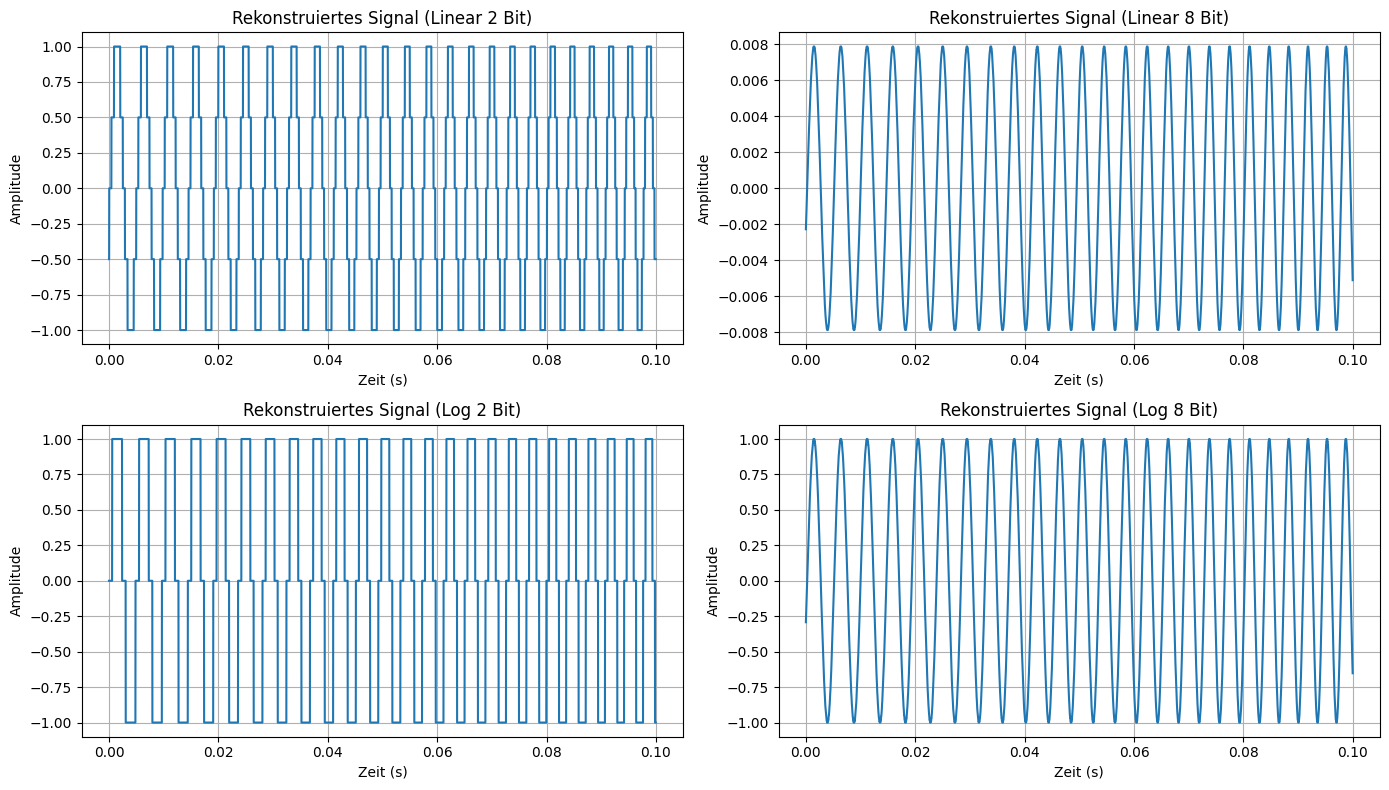

SNR Linear 2 Bit: 14.59 dB
SNR Linear 8 Bit: 0.07 dB
SNR Log 2 Bit: 8.59 dB
SNR Log 8 Bit: 48.77 dB


In [6]:
def reconstruct_linear_signal(quantized_signal, max_amplitude, num_bits):
    reconstructed_signal = quantized_signal / (2**(num_bits-1) - 1) * max_amplitude
    return reconstructed_signal

def reconstruct_logarithmic_signal(quantized_signal, max_log_signal, num_bits):
    sign = np.sign(quantized_signal)
    abs_quantized_signal = np.abs(quantized_signal)
    log_signal = abs_quantized_signal / (2**(num_bits-1) - 1) * max_log_signal
    reconstructed_signal = sign * (np.expm1(log_signal))
    return reconstructed_signal

reconstructed_linear_2bit = reconstruct_linear_signal(quantized_linear_2bit, max_linear_2bit, 2)
reconstructed_linear_8bit = reconstruct_linear_signal(quantized_linear_8bit, max_linear_8bit, 8)
reconstructed_log_2bit = reconstruct_logarithmic_signal(quantized_log_2bit, max_log_2bit, 2)
reconstructed_log_8bit = reconstruct_logarithmic_signal(quantized_log_8bit, max_log_8bit, 8)

noise_linear_2bit = sweep_signal - reconstructed_linear_2bit
noise_linear_8bit = sweep_signal - reconstructed_linear_8bit
noise_log_2bit = sweep_signal - reconstructed_log_2bit
noise_log_8bit = sweep_signal - reconstructed_log_8bit

def calculate_snr(signal, noise):
    signal_power = np.mean(signal**2)
    noise_power = np.mean(noise**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

snr_linear_2bit = calculate_snr(sweep_signal, noise_linear_2bit)
snr_linear_8bit = calculate_snr(sweep_signal, noise_linear_8bit)
snr_log_2bit = calculate_snr(sweep_signal, noise_log_2bit)
snr_log_8bit = calculate_snr(sweep_signal, noise_log_8bit)

plt.figure(figsize=(14, 8))

zoom_duration = 0.1  
zoom_samples = int(sample_rate * zoom_duration)

plt.subplot(2, 2, 1)
plt.plot(t1[:zoom_samples], reconstructed_linear_2bit[:zoom_samples])
plt.title('Rekonstruiertes Signal (Linear 2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(t1[:zoom_samples], reconstructed_linear_8bit[:zoom_samples])
plt.title('Rekonstruiertes Signal (Linear 8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(t1[:zoom_samples], reconstructed_log_2bit[:zoom_samples])
plt.title('Rekonstruiertes Signal (Log 2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(t1[:zoom_samples], reconstructed_log_8bit[:zoom_samples])
plt.title('Rekonstruiertes Signal (Log 8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f'SNR Linear 2 Bit: {snr_linear_2bit:.2f} dB')
print(f'SNR Linear 8 Bit: {snr_linear_8bit:.2f} dB')
print(f'SNR Log 2 Bit: {snr_log_2bit:.2f} dB')
print(f'SNR Log 8 Bit: {snr_log_8bit:.2f} dB')


e) Erstellen Sie jetzt ein eigenes Sprachsignal z.B.: "ich liebe es zu reisen" mit einer Quantisierung
von 32Bit und einer Abtastrate von 44,1kHz. Laden Sie das Signal und plotten Sie den Signalverlauf
und das zugehörige Leistungsspektrum in [dB].

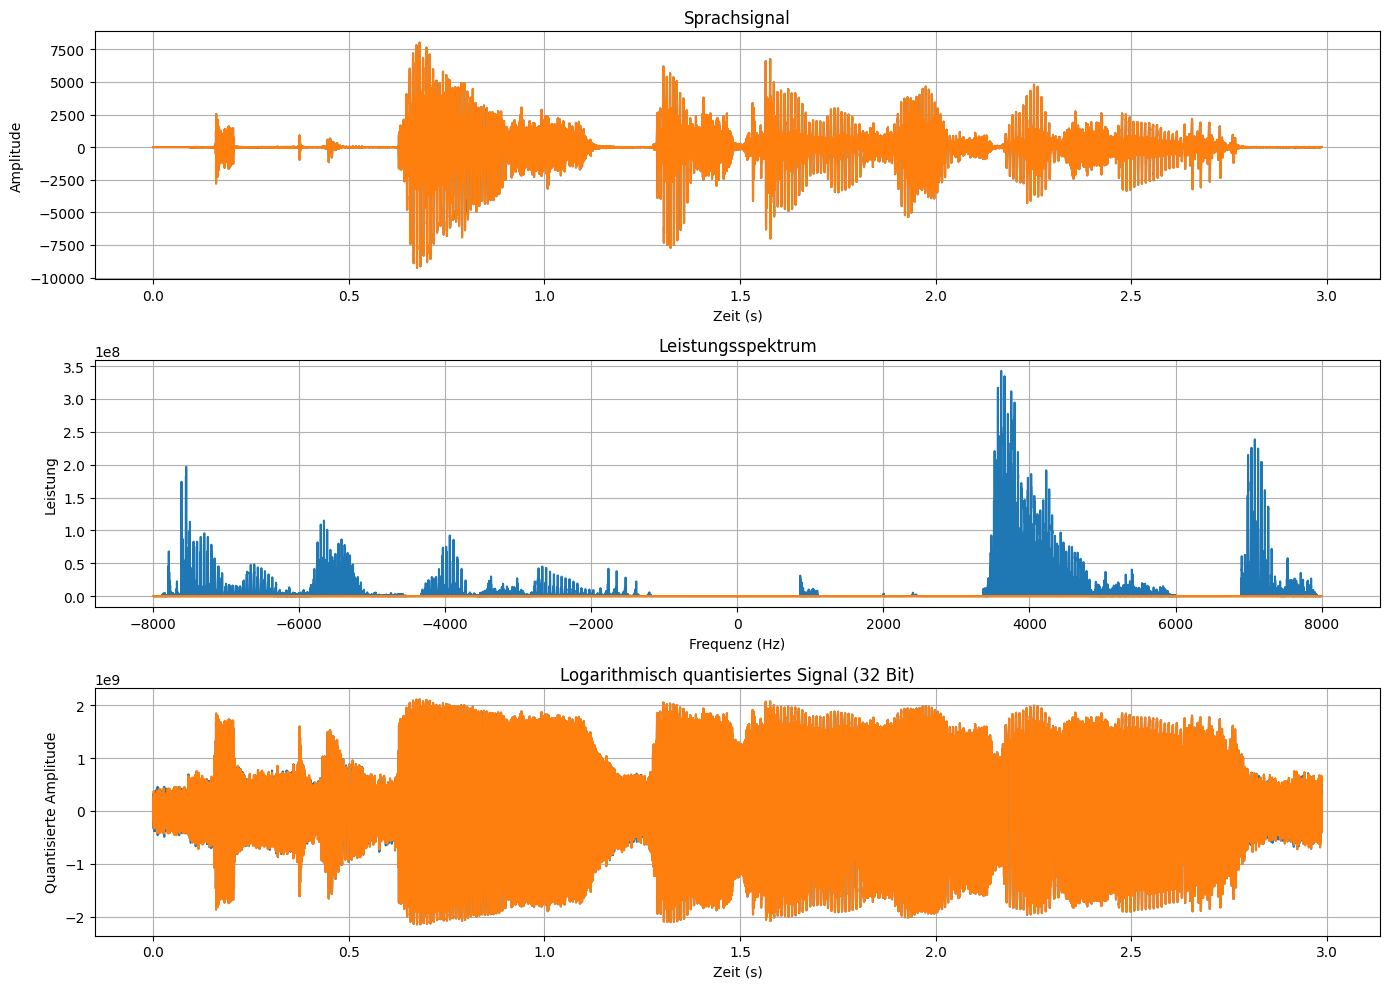

In [7]:
from scipy.fft import fft

audio_path = 'suchmaschine.wav'
sample_rate, audio_data = wavfile.read(audio_path, mmap=False)

duration = len(audio_data) / sample_rate

t = np.linspace(0, duration, len(audio_data))

quantized_log_32bit, max_log_32bit = logarithmic_quantize(audio_data, 32)

audio_fft = fft(audio_data)
freq = np.fft.fftfreq(len(audio_data), d=1/sample_rate)
power_spectrum = np.abs(audio_fft)**2

plt.figure(figsize=(14, 10))
plt.subplot(3, 1, 1)
plt.plot(t, audio_data)
plt.title('Sprachsignal')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(freq, power_spectrum)
plt.title('Leistungsspektrum')
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistung')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, quantized_log_32bit)
plt.title('Logarithmisch quantisiertes Signal (32 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()


f) Kodieren Sie jetzt das geladene Sprachsignal mit unterschiedlicher Bitanzahl q =(2,4,8,16) für die
lineare und logarithmische Quantisierung. Plotten Sie die kodierten Signale und geben Sie die
kodierte Sprachnachricht für die unterschiedlichen Verfahren auf dem Lautsprecher ihres PCs aus.
Diskutieren Sie die beobachteten Ergebnisse.

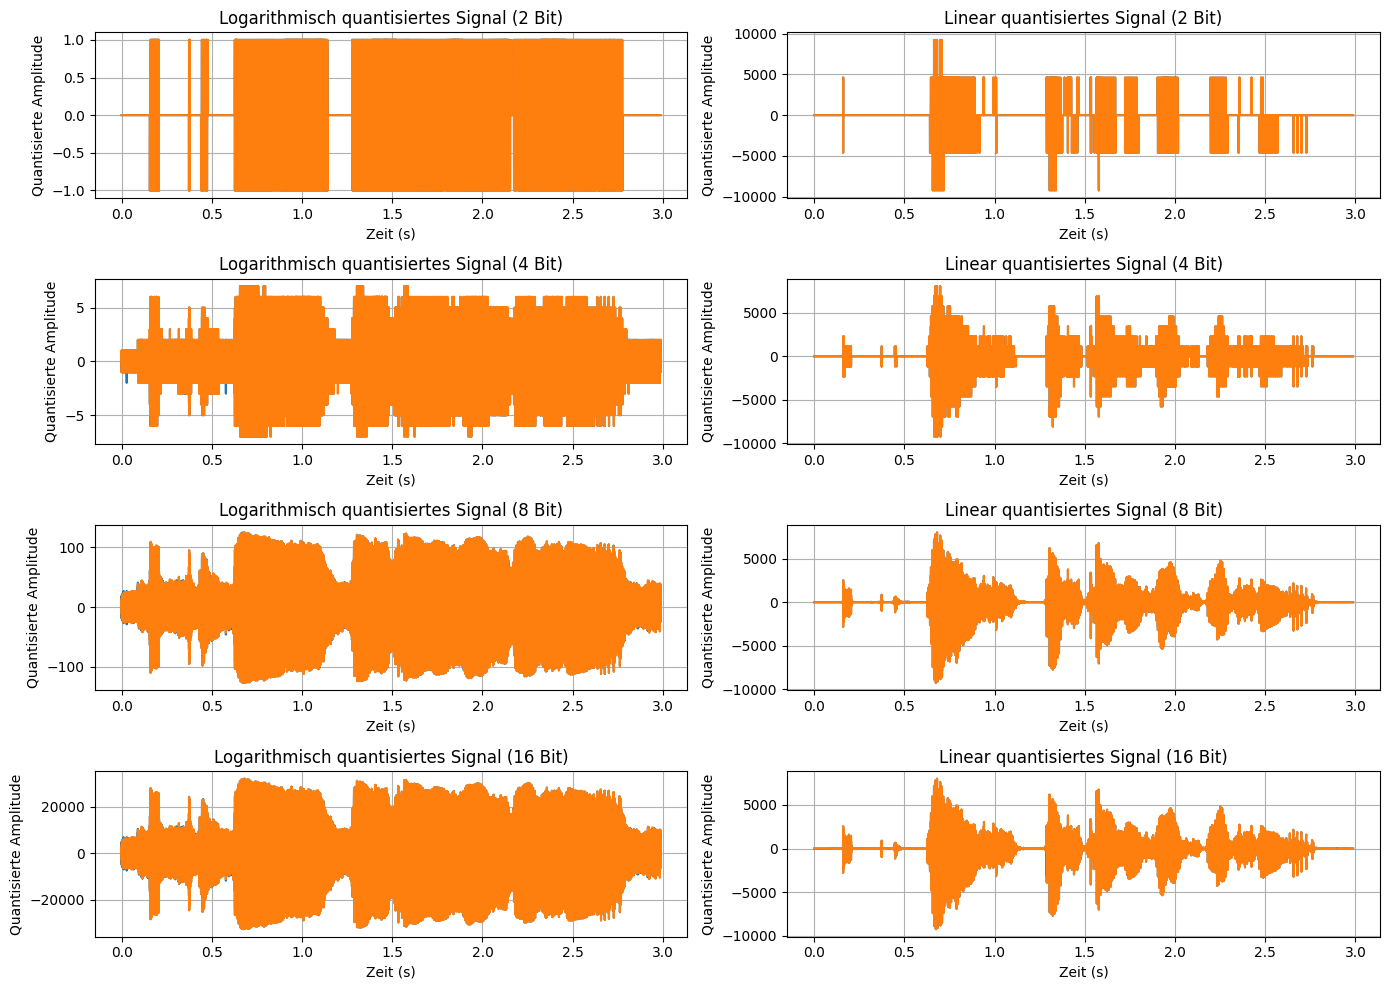

In [8]:

quantized_log_2bit, max_log_2bit = logarithmic_quantize(audio_data, 2)
quantized_log_4bit, max_log_4bit = logarithmic_quantize(audio_data, 4)
quantized_log_8bit, max_log_8bit = logarithmic_quantize(audio_data, 8)
quantized_log_16bit, max_log_16bit = logarithmic_quantize(audio_data, 16)

quantized_linear_2bit, max_linear_2bit = linear_quantize(audio_data, 2)
quantized_linear_4bit, max_linear_4bit = linear_quantize(audio_data, 4)
quantized_linear_8bit, max_linear_8bit = linear_quantize(audio_data, 8)
quantized_linear_16bit, max_linear_16bit = linear_quantize(audio_data, 16)

plt.figure(figsize=(14, 10))
plt.subplot(4, 2, 1)
plt.plot(t, quantized_log_2bit)
plt.title('Logarithmisch quantisiertes Signal (2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 2)
plt.plot(t, quantized_linear_2bit)
plt.title('Linear quantisiertes Signal (2 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 3)
plt.plot(t, quantized_log_4bit)
plt.title('Logarithmisch quantisiertes Signal (4 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 4)
plt.plot(t, quantized_linear_4bit)
plt.title('Linear quantisiertes Signal (4 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 5)
plt.plot(t, quantized_log_8bit)
plt.title('Logarithmisch quantisiertes Signal (8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 6)
plt.plot(t, quantized_linear_8bit)
plt.title('Linear quantisiertes Signal (8 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)


plt.subplot(4, 2, 7)
plt.plot(t, quantized_log_16bit)
plt.title('Logarithmisch quantisiertes Signal (16 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)

plt.subplot(4, 2, 8)
plt.plot(t, quantized_linear_16bit)
plt.title('Linear quantisiertes Signal (16 Bit)')
plt.xlabel('Zeit (s)')
plt.ylabel('Quantisierte Amplitude')
plt.grid(True)


plt.tight_layout()
plt.show()



g) Berechnen Sie den SNR-Wert für jeden Zeitwert und bestimmen Sie den zugehörigen mittleren
SNR-Wert. Erstellen Sie auch hier geeignet Diagramme und diskutieren Sie die Werte für den
mittleren SNR.

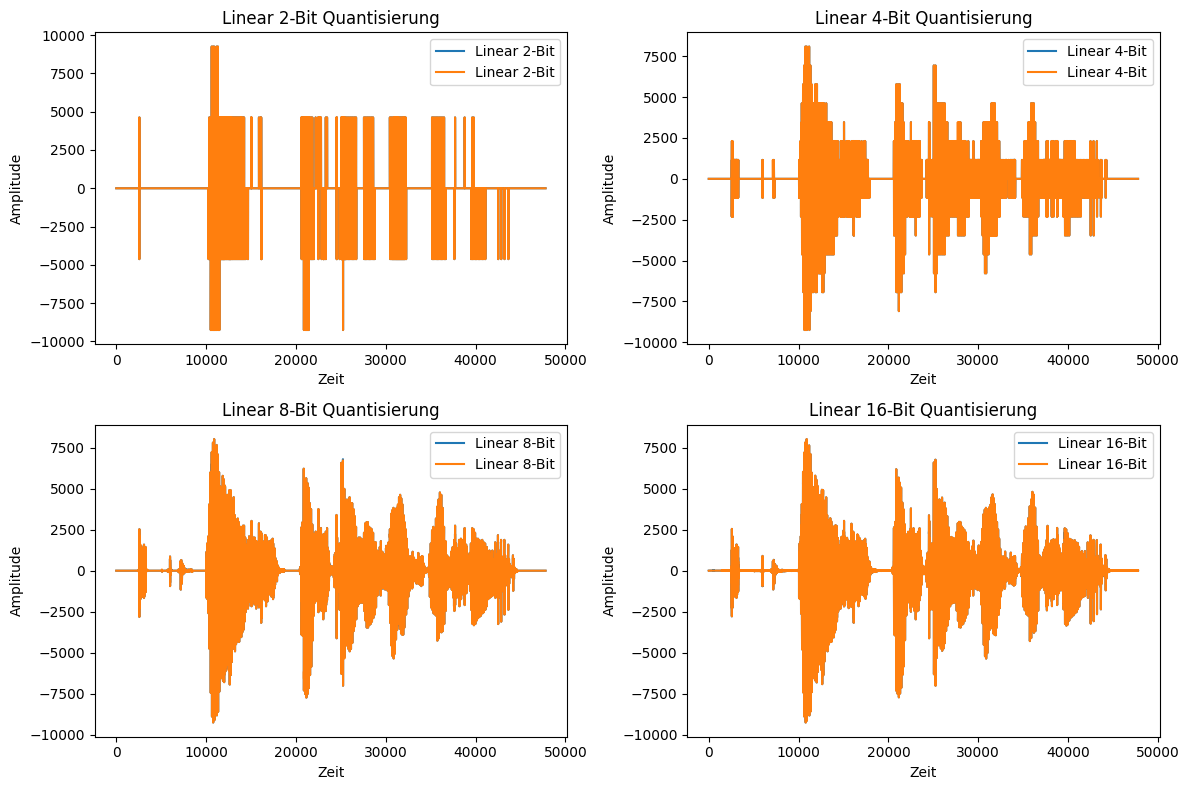

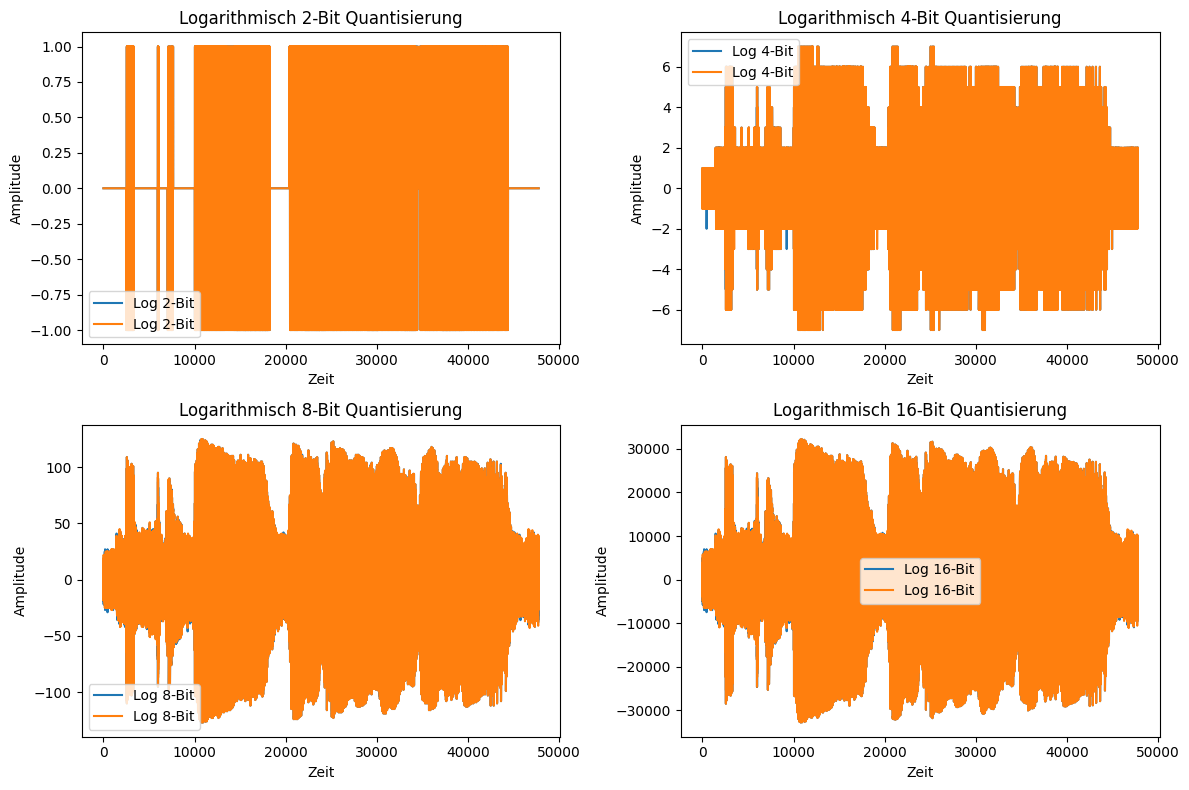

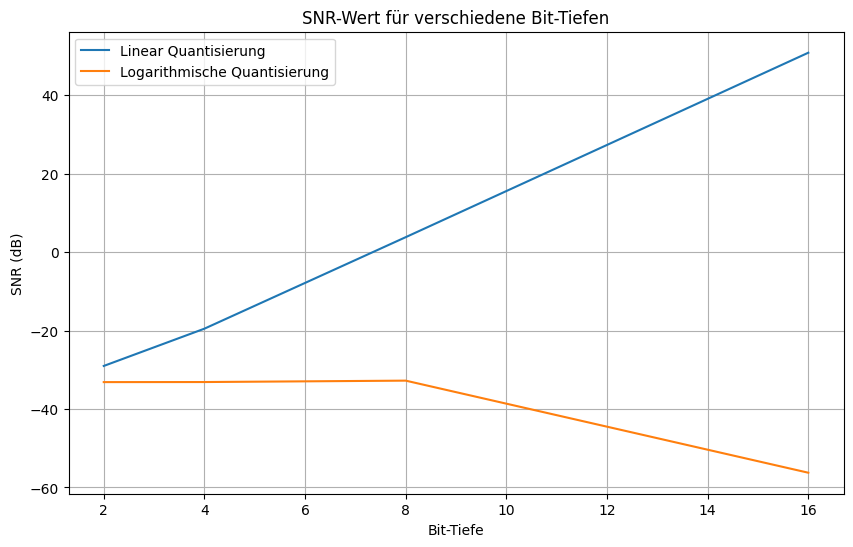

Mittlerer SNR-Wert für lineare Quantisierung: 1.519024568698331 dB
Mittlerer SNR-Wert für logarithmische Quantisierung: -38.8297107795513 dB


In [9]:
def calculate_snr(signal, noise):
    signal_power = np.mean(np.abs(signal)**2)
    noise_power = np.mean(np.abs(noise)**2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

bit_depths = [2, 4, 8, 16]

quantized_signals_linear = []
max_vals_linear = []
quantized_signals_log = []
max_vals_log = []

for b in bit_depths:
    q_signal_linear, max_val_linear = linear_quantize(audio_data, b)
    quantized_signals_linear.append(q_signal_linear)
    max_vals_linear.append(max_val_linear)
    
    q_signal_log, max_val_log = logarithmic_quantize(audio_data, b)
    quantized_signals_log.append(q_signal_log)
    max_vals_log.append(max_val_log)

snr_values_linear = []
snr_values_log = []

for quantized_signal in quantized_signals_linear:
    noise = audio_data - quantized_signal
    snr_values_linear.append(calculate_snr(audio_data, noise))

for quantized_signal in quantized_signals_log:
    noise = audio_data - quantized_signal
    snr_values_log.append(calculate_snr(audio_data, noise))

mean_snr_linear = np.mean(snr_values_linear)
mean_snr_log = np.mean(snr_values_log)

plt.figure(figsize=(12, 8))


for i, b in enumerate(bit_depths):
    plt.subplot(2, 2, i+1)
    plt.plot(quantized_signals_linear[i], label=f'Linear {b}-Bit')
    plt.title(f'Linear {b}-Bit Quantisierung')
    plt.xlabel('Zeit')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

for i, b in enumerate(bit_depths):
    plt.subplot(2, 2, i+1)
    plt.plot(quantized_signals_log[i], label=f'Log {b}-Bit')
    plt.title(f'Logarithmisch {b}-Bit Quantisierung')
    plt.xlabel('Zeit')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(bit_depths, snr_values_linear, label='Linear Quantisierung')
plt.plot(bit_depths, snr_values_log, label='Logarithmische Quantisierung')
plt.title('SNR-Wert für verschiedene Bit-Tiefen')
plt.xlabel('Bit-Tiefe')
plt.ylabel('SNR (dB)')
plt.legend()
plt.grid(True)
plt.show()

print("Mittlerer SNR-Wert für lineare Quantisierung:", mean_snr_linear, "dB")
print("Mittlerer SNR-Wert für logarithmische Quantisierung:", mean_snr_log, "dB")
